# Input check

In [1]:
import numpy as np
import re
from fractions import Fraction
class InputValidator():
  def __init__(self, equations):
        self.equations = equations
        
  variables = set()
  coefArr = []
  b = []
  alpha ="abcdefghijklmnopqrstuvwxyz"
  equations = []
  # helper function that extracts the variables from the equations
  def __variablesParser(self):
    self.variables = set()
    for i in self.equations:
      matchings = re.findall(r'[\w]+', i)
      for j in matchings:
        if j.isalnum() and not j.isnumeric():
          while j[0].isnumeric():
             j = j[1: len(j)]
          self.variables.add(j)
        
    self.variables = sorted(list(self.variables))
    self.coefArr = np.zeros(shape=(len(self.variables),len(self.variables)))
    self.b = np.zeros(len(self.variables))
    return 0
  # helper function that change the varibles to an alphabet and remove any number associated with it.
  def __formatVariables(self):
    if len(self.variables) != len(self.equations): return 2
    for i in range (0, len(self.equations)):
      self.equations[i] = self.equations[i].replace(" ", "")
      for j in range(len(self.variables)-1,-1,-1):
        self.equations[i] = re.sub(self.variables[j], self.alpha[j], self.equations[i])
    return 0
   
  # helper function to handle succeive postive and negative signs
  def __handleMultipleSigns(coef, sign):
    if coef == '+' and sign == '-':
      return '-'
    elif coef == '-' and sign == '+':
      return '-'
    else:
      return '+'
 # helper function to handle coeffecient values and its assignment to b values.
  def __handleCoefvalues(self, i,j, coef,  equalFlag):
    if self.equations[i][j] == "." or self.equations[i][j] == "/":
      return coef + self.equations[i][j]
    if coef == "" and self.equations[i][j] != "=":
      coef = coef + self.equations[i][j]
    elif coef == "-" or coef == "+" and self.equations[i][j] != "=":
      coef = self.handleMultipleSigns(coef, self.equations[i][j] )
    elif self.equations[i][j] != "=" or (self.equations[i][j] == "=" and coef != ""):
      if equalFlag == 0 or self.equations[i][j] == "=":
        try : self.b[i] -= eval(coef)
        except: return "error"
      else:
        try : self.b[i] += eval(coef)
        except: return "error"
      if self.equations[i][j] != "=":
        coef = self.equations[i][j]
      else:
        coef = ""    
    return coef
 # helper function to handle assignment of coeffcient values to coeffcient array.
  def __handleCoefAssignment(self, i,j, coef, equalFlag, variable):
    var = ord(variable) - ord('a')
    if coef == '-' or coef == '+':
      coef = coef + "1"
    if coef != "":
      if equalFlag == 0:
        try :self.coefArr[i][var] += eval(coef)
        except: return "error"
      else :
        try :self.coefArr[i][var] -= eval(coef)
        except: return "error"
    return ""
  validOperations = [".", "-", "+", "/", "="]
  # function for the  extraction coeffecient array and b values
  def __handleErrors(self):
    for i in range(0, len(self.equations)):
      coef = ""
      equalFlag = 0
      for j in range(0, len(self.equations[i])):
        if self.equations[i][j] == '=' :
          if equalFlag == 1: return 1
          equalFlag = 1
        if not self.equations[i][j].isalnum():
          #handle invalid operations
          if not self.equations[i][j] in self.validOperations:
            return 1
          coef = self.__handleCoefvalues(i,j, coef,  equalFlag)
          if coef == "error": return 1;
        if  self.equations[i][j].isnumeric():
          coef = coef + self.equations[i][j]
          if coef == "error": return 1
        if self.equations[i][j].isalpha():
          if j < len(self.equations[i])-1:
            if self.equations[i][j+1] == '.': 
              return 1
          if coef == "":
            coef = "1"
          coef =  self.__handleCoefAssignment(i, j, coef,  equalFlag, self.equations[i][j])
      if coef != "":
        try:
          self.b[i] += eval(coef)
        except:
          return 1
      #No equal sign in the equation
      if equalFlag == 0: return 1
    return 0
  # function for the  validations and extraction coeffecient array and b values
  def validation(self):
    """
    function for validations and extraction coeffecient array and b values
    :return: ِerror : 0 no error , 1  = Invalid input , 2 = number of equations != number of variables
           : A : coeffecient matrix
           : b : b matrix 
           : variables : variables order.
    """ 
    self.__variablesParser()
    error = self.__formatVariables()
    print(error)
    if error == 2:
      return 2, self.coefArr, self.b, self.variables
    error = self.__handleErrors()
    return error, self.coefArr, self.b, self.variables

def validate(function):
    symbols=['+','-','*','/']
    if (function.count('=') != 0):
        function = "error"
        return function
    function = function.replace("sin","math.sin").replace("cos","math.cos").replace("exp","math.exp").replace("^","**").replace("+-", "-").replace("++", "+").replace("-+", "-").replace("--", "+")
    print(function)
    for i in range (len(function)):
        if(i<len(function)-2 and function[i] in symbols and function[i+1] in symbols):
            if(function[i]!='-' and function[i+1]!='-' and (function[i]!='*' and function[i+1]!='*')):
                print("case 1")
                function="error"
                return function
            if(function[i]=='-' and function[i+1]!='-'):
                print("case 2")
                function = "error"
                return function

    return function

# Gauss Elimination

In [2]:
import numpy as np
import time
def gauss_pivot(A,f,numberofunknowns,noofdecimal):
    startTime=time.time()
    l=f.reshape(-1,1)
    Aug=np.append(A,l,axis=1) 
    print(Aug)
    
    noofdecimal=int(noofdecimal)
    
    rankA = np.linalg.matrix_rank(A) 
    rankAug=np.linalg.matrix_rank(Aug) 
    n = len(f)
    
    if(rankA!=rankAug):
        return(1,"System is inconsistent and there is no solution",A,0)
    elif(rankA==rankAug<numberofunknowns):
        return(1,"system has infinite number of solution",A,0)
    else:
        for i in range(int(0),int(n-1)):     # Loop through the columns of the matrix
            maxelement=max(A[:,i],key=abs)  #max element in col#i
            if (A[i,i])!=maxelement: #max element of col #i is not the one in the diagonal,pivoting is needed
                for k in range(i+1,n):
                    if np.abs(A[k,i])>np.abs(A[i,i]):
                        A[[i,k]]=A[[k,i]]             # Swaps ith and kth rows to each other
                        f[[i,k]]=f[[k,i]] 
                    
             #now elimination    
            for j in range(i+1,n):     # Loop through rows below diagonal for each column
                m = A[j,i]/A[i,i]      #get the multiply
                roundm=round(m,noofdecimal)
                A[j,:] =A[j,:] - roundm*A[i,:]
                f[j] = f[j] - roundm*f[i]
           
        return Back_Subs(A,f,noofdecimal,startTime) 
def Back_Subs(A,f,noofdecimal,startTime):
    
    
    n = f.size
    x = np.zeros(n)             # Initialize the solution vector, x, to zero
    x[n-1] = round(f[n-1]/A[n-1,n-1],noofdecimal)    # Solve for last entry first
    
    for i in range(n-2,-1,-1):      # Loop from the end to the beginning
        sum_ = 0
        for j in range(i+1,n):         
            sum_ = round(sum_ + A[i,j]*x[j],noofdecimal)
        x[i] = round((f[i] - sum_)/A[i,i],noofdecimal)  
    end = time.time()    
    runtime = end - startTime
    return 0,x,A,runtime

# Gauss Jordan Method

In [3]:
import time
def Gauss_Jordan(A,f,numberofunknowns,noofdecimal):
    start=time.time()
    l=f.reshape(-1,1)
    Aug=np.append(A,l,axis=1) 
    print(Aug)
    
    noofdecimal=int(noofdecimal)
    
   # A=np.array((D),dtype=float)
   # f=np.array((g),dtype=float)
    rankA = np.linalg.matrix_rank(A) 
    rankAug=np.linalg.matrix_rank(Aug) 
    n = len(f)
    
    if(rankA!=rankAug):
        return(1,"System is inconsistent and there is no solution",0,0)
    elif(rankA==rankAug<numberofunknowns):
        return(1,"system has infinite number of solution",0,0)
    else:
        for i in range(int(0),int(n-1)):     # Loop through the columns of the matrix
            maxelement=max(A[:,i],key=abs)  #max element in col#i
            if (A[i,i])!=maxelement: #max element of col #i is not the one in the diagonal,pivoting is needed
                for k in range(i+1,n):
                    if np.abs(A[k,i])>np.abs(A[i,i]):
                        A[[i,k]]=A[[k,i]]             # Swaps ith and kth rows to each other
                        f[[i,k]]=f[[k,i]] 
        print(f)            
            # Applying Gauss Jordan Elimination    
        for i in range(int(n)):     
            for j in range(int(n)):
             
            # Excluding all i == j
                if (i != j):
                        print("ana gwa") 
                # Converting Matrix to reduced row
                # echelon form(diagonal matrix)
                        pro = A[j][i] / A[i][i];
                        roundmo=round(pro,noofdecimal)
                        for k in range(n):                
                              A[j][k] = A[j][k] - (A[i][k]) * roundmo;  
                        f[j]=f[j]-f[i]*roundmo
                      
        print(A)
        print(f)
        for i in range(n):
              f[i] = f[i]/A[i][i]
        x = np.zeros(n)
        for i in range(n):  
             x[i] = round(f[i],noofdecimal)
                            
    end =time.time() 
    runtime=end-start
    return 0,x,A,runtime 


# Gauss Seidel

In [4]:
import numpy as np
from numpy import linalg as LA
import time

def normCalc(xnew, xold):
  ea = np.subtract(xnew,xold)
  for i in range(len(xnew)):
    ea[i] = ea[i]/xnew[i]
  return LA.norm(ea)

def gaussSeidel(intialGuess, A, b, maxIterations, Es,prec):
   startTime=time.time()
   old = [0 for i in range(len(intialGuess))]
   k=1
   L=0
   runTime=0
  
   while k <= maxIterations:

       for z in range(len(intialGuess)):
           old[z] = intialGuess[z]
      

       for i in range (0,len(A)):                 # calculate the 3 new guesses
           value = b[i]
           print(value)
           for j in range (0,len(A)):
               if(j!=i):
               
                      
                    value=value-A[i][j]*intialGuess[j]
                    
           if(A[i][i]==0):
               L=1
               end = time.time()
               runtime=end-startTime
               return intialGuess,L,runTime
           value =value / A[i][i]
           
           intialGuess[i]=value
           
       if (k != 1):
                   print(intialGuess)
                   Ea = normCalc(intialGuess,old)
                   if (Ea <= Es ):
                        end = time.time()
                        runtime=end-startTime
                        for z in range(len(intialGuess)):
                            intialGuess[z]=round(intialGuess[z],prec)
        
                        return intialGuess,L,runtime
       k=k+1
       print(intialGuess)
   end = time.time()
   runtime = end - startTime
   for z in range(len(intialGuess)):
      intialGuess[z]=round(intialGuess[z],prec)
   return intialGuess,L,runtime

In [5]:
intialGuess=[1,1,1]
A=np.array([[ 4.,  2.,  1.],
 [-1. , 2. , 0.],
 [ 2.  ,1.,  4.]])
b=np.array([11.,  3., 16.])
print(gaussSeidel(intialGuess, A, b, 3, 0.0000001,4))

11.0
3.0
16.0
[2.0, 2.5, 2.375]
11.0
3.0
16.0
[0.90625, 1.953125, 3.05859375]
[0.90625, 1.953125, 3.05859375]
11.0
3.0
16.0
[1.0087890625, 2.00439453125, 2.9945068359375]
[1.0087890625, 2.00439453125, 2.9945068359375]
([1.0088, 2.0044, 2.9945], 0, 0.004732847213745117)


# LU decomposition

In [6]:
import numpy as np
import math

def forward_substitution(L, b, sigFigs):
  n = len(L)
  x = np.zeros(n)
  x[0] = b[0] / L[0,0]
  for i in range(n):
    temp = b[i]
    for j in range(i):
      temp = temp - (L[i,j] * x[j])
    x[i] = round(temp / L[i,i], sigFigs)
    #print(x)
  return x 

def backward_substitution(U, d, sigFigs):
  n = len(U)
  x = np.zeros(n)
  for i in range(n-1, -1, -1):
      temp = d[i]
      for j in range(i+1, n):
          temp -= U[i,j] * x[j]
      x[i] = round(temp / U[i,i], sigFigs)
    #print(x)
  return x
  
  #seperation of L
def extractL(compressed):
  n = len(compressed)
  L = np.identity(n) #identity --> diagonals = 1
  for i in range(1,n):
    for j in range(0,i):
      #print(compressed[i,j])
      L[i,j] = float(compressed[i,j])
  return L

  #separation of U
def extractU(compressed):
  n = len(compressed)
  U = np.zeros((n, n))
  for i in range(0,n-1):
    for j in range(i+1,n):
      U[i,j] = compressed[i,j]
    #set diagonal elements
  for i in range(0,n):
    U[i,i] = compressed[i,i]
  return U

 #doolittle method
def doolittle(A, b,sigFigs, unknownsNumber):
  startTime=time.time()
  n = len(A)
  U = np.zeros((n, n)) #set U to zeros
  L = np.identity(n) #set L to identity matrix of same length as A
  #consistency attributes
  augB = b.reshape(-1,1)
  Aug = np.append(A,augB, axis=1)
  rankA = np.linalg.matrix_rank(A) 
  rankAug=np.linalg.matrix_rank(Aug) 
  #consistency check
  if(rankA!=rankAug):
    end = time.time()    
    runTime = end - startTime
    return 1,0,0,"System is inconsistent and there is no solution",runTime
  elif(rankA==rankAug<unknownsNumber):
    end = time.time()    
    runTime = end - startTime
    return 1,0,0,"System has infinite number of solutions",runTime
  else: #unique consistent system
    for i in range(n-1):
      #partial pivoting
      maxelement=max(A[:,i],key=abs)  #max element in col#i
      if (A[i,i])!=maxelement: #max element of col #i is not the one in the diagonal,pivoting is needed
        for k in range(i+1,n):
          if np.abs(A[k,i])>np.abs(A[i,i]):
            A[[i,k]]=A[[k,i]]             # Swaps ith and kth rows to each other
            b[[i,k]]=b[[k,i]] 

        #decomposing A to copmact representaion
      for k in range(i+1,n):          
        A[k,i] = round(A[k,i]/A[i,i], sigFigs)      
        for j in range(i+1,n):      
          A[k,j] -= round(A[k,i]*A[i,j], sigFigs) 
    #extract A to L,U and solve by forward then backward substition
    L = extractL(A)
    U = extractU(A)
    
    #Ld=b
    d = forward_substitution(L, b,sigFigs)
    #Ux=d
    x = backward_substitution(U, d,sigFigs)
    end = time.time()    
    runTime = end - startTime
    return 0, L, U, x, runTime

def crout(A, b, sigFigs, unknownsNumber):
  startTime=time.time()
  n = len(A)
  L = np.zeros((n, n)) #set L to zeros
  U = np.identity(n) #set U to indentity matrix of same length as A
  #consistency attributes
  augB = b.reshape(-1,1)
  Aug = np.append(A,augB, axis=1)
  rankA = np.linalg.matrix_rank(A) 
  rankAug=np.linalg.matrix_rank(Aug) 
  #consistency check
  if(rankA!=rankAug):
    end = time.time()    
    runTime = end - startTime
    return 1,0,0,"System is inconsistent and there is no solution",runTime
  elif(rankA==rankAug<unknownsNumber):
    end = time.time()    
    runTime = end - startTime
    return 1,0,0,"System has infinite number of solutions",runTime
  else: #unique consistent system
    for i in range(0, n):
      #setting L matrix
        for j in range(i,n):
          summationL = 0
          for k in range(0,j):
            summationL += L[j,k] * U[k,i]
          L[j,i] = A[j,i] - summationL
          L[j,i] = round(L[j,i], sigFigs)
      #setting U matrix
        for j in range(i+1,n):
          summationU = 0
          for k in range(0,i):
            summationU += L[i,k] * U[k,j]
          U[i,j] = (A[i,j] - summationU) / L[i, i] 
          U[i,j] = round(U[i,j], sigFigs)
    #Ld = b
    d = forward_substitution(L,b,sigFigs)
    #Ux = d
    x = backward_substitution(U,d,sigFigs) #final solution
    end = time.time()    
    runTime = end - startTime
    return 0, L, U, x, runTime

def chelosky(A, b, sigFigs, unknownsNumber):
  startTime=time.time()
  #consistency attributes
  augB = b.reshape(-1,1)
  Aug = np.append(A,augB, axis=1)
  rankA = np.linalg.matrix_rank(A) 
  rankAug=np.linalg.matrix_rank(Aug) 
  #consistency check
  if(rankA!=rankAug):
    return 1,0,0,"System is inconsistent and there is no solution"
  elif(rankA==rankAug<unknownsNumber):
    return 1,0,0,"System has infinite number of solutions"
  #unique consistent system
  elif(np.all(np.abs(A-A.T) < 1e-8)):  #check symmetry with transpose by tolerance:
    n = len(A)
    L = np.zeros((n, n)) #set L to zeros of same length as A
    for j in range(n): #cols
      for i in range(j,n): #rows
        if(i==j): #diagonal elements formula
          summation = 0
          for k in range(j):
            summation+= math.pow(L[i,k],2)
          L[i,j] = np.sqrt(A[i,j]-summation) #set L matrix
          L[i,j] = round(L[i,j], sigFigs) #round to sig figs no.
        else: 
          summation = 0
          for k in range(j):
            summation += L[i,k]*L[j,k]
          L[i,j] = (A[i,j] - summation) / L[j,j] #set L matrix
          L[i,j] = round(L[i,j], sigFigs) #round to sig figs no.
    U = L.transpose() #set U to L transpose
    #Ld = b
    d = forward_substitution(L, b, sigFigs)
    #Ux = d
    x = backward_substitution(U, d, sigFigs) #final solution
    end = time.time()    
    runTime = end - startTime
    return 0,L,U,x,runTime;
  else: #nonsymmetric system
    end = time.time()    
    runTime = end - startTime
    return 1,0,0,"System is not symmetric",runTime

# Jacobi Method

In [7]:
import numpy
import numpy as np
import time
from numpy import linalg as LA
def jacobi(x, A, b ,tol ,maxIteraions, precision):
    
  startTime=time.time()
  for k in range(0, maxIteraions):
    print("hey")
    x_new = np.empty(len(A))
    for i in range(0, len(A)):
      sum = 0
      for j in range(0, len(A)):
        if i == j:
          sum = round(sum + b[i], precision)
        if i != j:
          sum = round(sum - round(x[j]*A[i][j], precision), precision)
      if A[i][i] == 0:
        end = time.time()    
        runtime = end - startTime
        return x, 1,runtime
      x_new[i] = round(sum/round(A[i][i], precision), precision)
    ea = normCalc(x_new, x)
    if(ea < tol):
      end = time.time()    
      runtime = end - startTime  
      return x_new, 0,runtime
      break;
    x = x_new 
    end = time.time()    
    runtime = end - startTime
  return x, 0,runtime


      
def normCalc(xnew, xold):
  ea = np.subtract(xnew,xold)
  for i in range(len(xnew)):
    ea[i] = ea[i]/xnew[i]
  return LA.norm(ea)
a = [[1,1], [1, -1]]
b = [1,5]




In [8]:
import math
def evaluate(value, function):
  x = value
  return eval(function)

# Bisection

In [9]:
def bisection(xl,xu,e , function,noofiterations,signicatnnim):
    startTime = time.time()
    XL=xl
    XU=xu
    if evaluate(xu, function)* evaluate(xl, function) > 0.0:
        return 1,"Given  values do not bracket the root.", 0.000
    step = 1
    condition = True
    while condition or step<noofiterations:
        xr = (xu + xl)/2   #midpoint
        if evaluate(xl, function) * evaluate(xr, function) < 0:
            xu = xr        #Xupper=midpont            
        else:
            xl = xr        #xlower=midpoint        
        step = step + 1
        condition = abs(evaluate(xr, function)) > e 
    return 0,round(xr,signicatnnim), time.time() - startTime


# False Postion

In [10]:
def false_postion(xl, xu, function,  tol = 0.00001, maxIterations = 50):
  startTime = time.time()
  xold = 0
  xr = 0
  fun_xl = evaluate(xl, function)
  fun_xu = evaluate(xu, function)
  if fun_xl* fun_xu > 0.0:
    return 1,"Given  values do not bracket the root.", 0.000
  for i in range(0, maxIterations):
    xr = (xl*fun_xu - xu*fun_xl)/(fun_xu - fun_xl)
    fun_xr = evaluate(xr, function)
    if fun_xr == 0:
      return 0, xr,  time.time()-startTime
    if fun_xr * fun_xl < 0:
      xu = xr
      fun_xu = fun_xr
    else:
      xl = xr
      fun_xl = fun_xr
    if i > 0:
      if(abs(xr - xold)< tol): break
    xold = xr
  return 0,xr, time.time()-startTime


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import derivative
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as tk
from tkinter.ttk import * 


def plot_bis_false(xl, xu, xr, function):

  print(xr, xu, xl, function)
  # 100 linearly spaced numbers
  rng = (xl + xu)/2.0
  points = []
  xl_range = abs(xl-rng*2) 
  xu_range = abs(xu+rng*2)
  if xl_range > xu_range:
        points = np.linspace(-xl_range,xl_range  ,100)
  else:
       points = np.linspace(-xu_range,xu_range  ,100)
        
  # the function
  y = list()
  for i in range(0, 100):
    x = points[i]
    y.append(eval(function))
  # setting the axes at the centre
  fig = plt.figure()
  fig.set_dpi(100)
  ax = fig.add_subplot(1, 1, 1)
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  plt.grid(True, linestyle =':')
  plt.plot(points ,y,'r')
  xabs_max = abs(max(ax.get_xlim(), key=abs)) 
  print(xabs_max)
  ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
  yabs_max = abs(max(ax.get_ylim(), key=abs)) 
  ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
  #graph size
  plt.axvline(x= xl)
  plt.axvline(x=xu)
  plt.text(xr,0,'xr')
  plt.text(xl,0,'xl')
  plt.text(xu,0,'xu' )
  plt.axvline(x=xr, color = "green", linestyle ="--")
  plot = tk.Tk()
  plot.title("Plot")
  canvas = FigureCanvasTkAgg(fig, plot)
  canvas.get_tk_widget().pack()
  canvas.draw()
  plot.mainloop()
  # show the plot
#plot_bis_false(1,3, 1.3484, "x**3-x-1")


# Fixed Point

In [12]:
import math
from sympy import symbols, Eq, solve
import numpy as np
import matplotlib.pyplot as plt
import time
def FixedPoint(g ,x0, Es , max_iterations):
    starttime=time.time()
    ea=0
    xr=x0
    iterations=0
    while True:
        try:
            xr_old=xr
            xr=evaluate(xr_old,g)+xr_old
            if(xr!=0):
                 ea=abs((xr-xr_old)/xr)*100
            iterations=iterations+1
            endtime=time.time()
            total_time=endtime-starttime
            print(endtime-starttime)
            if(ea < Es or iterations>max_iterations):
                  return xr,total_time;
        except:        
        #if(endtime-starttime>10**-1):
            msg = "Failed to converge after %d iterations" % (iterations)
            return 'error',msg
def plot_fixed_point(g ,x0 ,xr_old):
    x=np.linspace(x0-4,xr_old+8, 100)
    y = []
    for i in range(0, 100):
        y.append(evaluate(x[i],g)+x[i])
    # setting the axes at the centre
    fig = plt.figure()
    fig.set_dpi(100)
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # ax.xaxis.set_ticks_position('bottom')
    #ax.yaxis.set_ticks_position('left')


    #plt.plot(xpoints, ypoints, linestyle='-', color='red', scalex=False, scaley=False ,label='y=x')
    plt.plot(x,x,label='y=x')
    plt.plot( x,y, '-',label='g(x)')

    #intersection
    idx = np.argwhere(np.diff(np.sign(x-y))).flatten()
    plt.plot(x[idx], x[idx], 'ro')

    plt.legend()
    plt.grid(True, linestyle =':')
    plt.xlim([-x0-3,x0+3])
    plt.ylim([-4,4])
    plt.text(xr_old,2,'xr')
    plt.axvline(x=xr_old, color = "green", linestyle ="--")
    plot = tk.Tk()
    plot.title("Plot")
    canvas = FigureCanvasTkAgg(fig, plot)
    canvas.get_tk_widget().pack()
    canvas.draw()
    plot.mainloop()
    # show the plot
    plt.show()

# Newton_Raphson

In [13]:
import sympy as sy
import time
def plot_newton(function,root):
    x = symbols('x')
    f = eval(function)
    fderivative=f.diff(x)
    
    ylist = list()
    xlist = np.linspace(-4*abs(root), 4*abs(root), 100)
    for i in range(0, 100):
        der = np.float(fderivative.evalf(subs= {x:xlist[i]}))
        ylist.append(der)
  #  print(ylist)
    fig = plt.figure()
    fig.set_dpi(100)
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.title('Derivetive of f(x)')
    plt.plot(xlist, ylist)
    plt.show()
    plot = tk.Tk()
    plot.title("Plot")
    canvas = FigureCanvasTkAgg(fig, plot)
    canvas.get_tk_widget().pack()
    canvas.draw()
    plot.mainloop()


def NewtonRaphson(function,intialGuess,MaxInterations,precision,Es ):
    startTime = time.time()
    x = symbols('x')
    f = eval(function)
    print("lolo", f)
    fderivative=f.diff(x)
    print("soso", str(fderivative))
    Xi=intialGuess
    XiBlusOne=0
    i=1
    Ea=100
    while(Ea>Es and i<MaxInterations):
        XiBlusOne=round(Xi-(np.float(f.evalf(subs= {x:Xi})) / np.float(fderivative.evalf(subs= {x:Xi}))),precision)
        print(XiBlusOne)
        if(i!=1):
            Ea=abs((XiBlusOne-Xi)/XiBlusOne)*100
            print(Ea)
        Xi=XiBlusOne
        i=i+1
        print("end of iteration\n")
    EndTime=time.time()
    long=(EndTime-startTime)
    return XiBlusOne,long



# Secant 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def secant(eq, x1, x2, n, tol):
  startTime = time.time()
  for i in range(1,n):
    x = x2
    fnx2 = eval(eq)
    x = x1
    fnx1 = eval(eq)
    x3 = x2 - ((fnx2 * (x1-x2)) / (fnx1 - fnx2))
    print("Value of iteration", i , " is ", x3)

    if(abs(((x3 - x2)/ x3)) < tol):
      return x3, time.time()-startTime
    x1 = x2
    x2 = x3

  return x3, time.time()-startTime

def secant_plot(fun, root):
  #step size
  h = 0.1
  x = np.arange(root-1, root+1, h)
  y = []
  for i in range(0, len(x)):
    y.append(evaluate(x[i], fun))
  y = np.array(y)
  # compute vector of forward differences
  forward_diff = np.diff(y)/h 
  yy = y[:-1:] 
  x_diff = x[:-1:]


  fig = plt.figure()
  fig.set_dpi(100)
  plt.plot(x_diff, forward_diff, '--', \
          label = 'Finite difference approximation of f''(x)')

  plt.legend()

  plot = tk.Tk()
  plot.title("Plot")
  canvas = FigureCanvasTkAgg(fig, plot)
  canvas.get_tk_widget().pack()
  canvas.draw()
  plot.mainloop()



# GUI

In [15]:
def showLU(L,U):
    label = tk.Label(window, text= "L=",name="l_txt", font=('Arial Bold',25),fg="blue")
    label.place(x=800 ,y=550)
    blank = tk.Text(window, width=25, height=6,name="l_array", font=('Arial Bold',10))
   # blank.delete(0.0,'end-1c')
    blank.place(x=860 ,y=550)
    for i in range(len(L)):
        for j in range(len(L)):
              blank.insert('end-1c', "%0.04f  " %L[i][j])
        blank.insert('end-1c', "\n")        
    label = tk.Label(window, text= "U=",name="u_txt", font=('Arial Bold',25),fg="blue")
    label.place(x=1100 ,y=550)
    block = tk.Text(window, width=25,name="u_array", height=6, font=('Arial Bold',10))
    #block.delete(0.0,'end-1c')
    block.place(x=1160 ,y=550)
    for i in range(len(U)):
        for j in range(len(U)):
             block.insert('end-1c', "%0.04f  " %U[i][j])
        block.insert('end-1c', "\n") 
    
        
    

In [16]:

def showing_answer(A):
    answer=""
    x,y,z,l=Solve()
    label = tk.Label(window, text= "The final answer is:",name="answer_txt", font=('Arial Bold',25),fg="blue")
    label.grid(column=0 ,row=6)
    for i in range(len(A)):
        
        answer+=l[i]+"="+str(A[i])+"  "
    print(answer)    
    labl = tk.Label(window, text=answer,name="answer", font=('Arial Bold',24),fg="blue")
        
    labl.place(x=150 ,y=560)

In [17]:
def show_answer(xr):
    label = tk.Label(window, text= "The final answer is:",name="answer_txt", font=('Arial Bold',25),fg="blue")
    label.grid(column=0 ,row=6)
    labl = tk.Label(window, text= "x = "+str(xr),name="answer", font=('Arial Bold',24),fg="black")
    labl.place(x=150 ,y=560)


In [18]:
def showA(A):
    label = tk.Label(window, text= "A=", font=('Arial Bold',25),fg="blue")
    label.place(x=800 ,y=550)
    blank = tk.Text(window, width=25, height=6, font=('Arial Bold',10))
   # blank.delete(0.0,'end-1c')
    blank.place(x=860 ,y=550)
    for i in range(len(A)):
        for j in range(len(A)):
              blank.insert('end-1c', "%0.04f  " %A[i][j])
        blank.insert('end-1c', "\n") 

In [19]:
import re
LISTS=[]
prev_method = 0
method = 0
ans = 0
global error,a,b
non_linear = ""


def selected(event):
    #displaying entries widgets for the additional parammetetrs
    #needed in specific methods
    global ini
    global method
    global no 
    global er
    global xl
    global xu
    global x0
    global x1
    global prev_method
    print(clicked.get())
    prev_method =method
    method=clicked.get()
    clear()
    if(method=="Jacobi"):
        tk.Label(window, text="Enter initial guess" ,name="initials_text").grid(column=1,row=6)
        ini=tk.Entry(window ,width=10,name="initials")
        ini.grid(column=2,row=6)
        tk.Label(window, text="Enter Number of iterations",name="iterations_text").grid(column=1,row=8)
        no=tk.Entry(window ,width=10,name="iterations")
        no.grid(column=2,row=8)
        tk.Label(window, text="Enter Absolute relative error",name="relative_text").grid(column=1,row=9)
        er=tk.Entry(window ,width=10,name="relative")
        er.grid(column=2,row=9)
        
    elif(method=="Gauss Seidel"):
        tk.Label(window, text="Enter initial guess", name="initials_text").grid(column=1,row=6)
        ini=tk.Entry(window ,width=10,name="initials")
        ini.grid(column=2,row=6)
        tk.Label(window, text="Enter Number of iterations",name="iterations_text").grid(column=1,row=8)
        no=tk.Entry(window ,width=10,name="iterations")
        no.grid(column=2,row=8)
        tk.Label(window, text="Enter Absolute relative error",name="relative_text").grid(column=1,row=9)
        er=tk.Entry(window ,width=10,name="relative")
        er.grid(column=2,row=9)
    elif(method=="LU decomposition"):
        global dropdownLU
        tk.Label(window, text="Choose the form you want",name="lu_txt").grid(column=1,row=6)
        dropdownLU=Combobox(window,name="lu_list")
        dropdownLU['values']=("Downlittle Form", "Crout Form", "Cholesky Form")
        dropdownLU.grid(column=2,row=6)
    elif (method == "Bisection" or method == "False postion"):
        tk.Label(window, name = "xl_text",text="Enter xl").grid(column=1,row=6)
        xl=tk.Entry(window ,width=10, name = "xl")
        xl.grid(column=2,row=6)
        tk.Label(window, name = "xu_text", text="Enter xu").grid(column=1,row=8)
        xu=tk.Entry(window ,name = "xu",width=10)
        xu.grid(column=2,row=8)
        tk.Label(window, name = "tol_text",text="Enter tolerance").grid(column=1,row=9)
        er=tk.Entry(window ,name = "tol",width=10)
        er.grid(column=2,row=9)
        tk.Label(window,name = "maxIt_text",text="Enter Number of iterations").grid(column=1,row=10)
        no=tk.Entry(window, name = "maxIt",width=10)
        no.grid(column=2,row=10)
        
    elif method == "Fixed Point" or method == "Newton Raphson":
        tk.Label(window, name = "x0_text",text="Enter x0").grid(column=1,row=6)
        x0=tk.Entry(window ,width=10, name = "xl")
        x0.grid(column=2,row=6)
        tk.Label(window, name = "tol_text",text="Enter tolerance").grid(column=1,row=8)
        er=tk.Entry(window ,name = "tol",width=10)
        er.grid(column=2,row=8)
        tk.Label(window,name = "maxIt_text",text="Enter Number of iterations").grid(column=1,row=9)
        no=tk.Entry(window, name = "maxIt",width=10)
        no.grid(column=2,row=9)
       
    elif method == "Secant":
        tk.Label(window, name = "x0_text",text="Enter x0").grid(column=1,row=6)
        x0=tk.Entry(window ,width=10, name = "x0")
        x0.grid(column=2,row=6)
        tk.Label(window, name = "x1_text", text="Enter x1").grid(column=1,row=8)
        x1=tk.Entry(window ,name = "x1",width=10)
        x1.grid(column=2,row=8)
        tk.Label(window, name = "tol_text",text="Enter tolerance").grid(column=1,row=9)
        er=tk.Entry(window ,name = "tol",width=10)
        er.grid(column=2,row=9)
        tk.Label(window,name = "maxIt_text",text="Enter Number of iterations").grid(column=1,row=10)
        no=tk.Entry(window, name = "maxIt",width=10)
        no.grid(column=2,row=10)
        
        
            

def clear():
    print(prev_method) 
    str=["error","answer_txt","answer","runtime"] 
    for s in str:
        try:
            window.nametowidget(s).destroy()
        except:continue  
    if (prev_method == "Bisection"or prev_method == "False postion"):
        str = ["xl", "xl_text", "xu", "xu_text", "tol", "tol_text", "maxIt", "maxIt_text"]
        for s in str:
            try:
                window.nametowidget(s).destroy()
            except: continue
    elif (prev_method =="Jacobi" or prev_method == "Gauss Seidel"):
        str = ["initials_text", "initials", "iterations_text", "iterations", "relative_text", "relative"]
        for s in str:
            try:
                window.nametowidget(s).destroy()
            except: continue
    elif(prev_method =="LU decomposition"):
        str=["lu_txt","lu_list","l_txt","l_array","u_txt","u_array"]
        for s in str:
            try:
                window.nametowidget(s).destroy() 
            except:
                continue
    elif prev_method == "Fixed Point" or prev_method == "Newton Raphson":
        str = ["x0", "x0_text", "tol", "tol_text", "maxIt", "maxIt_text"]
        for s in str:
            try:
                window.nametowidget(s).destroy() 
            except: continue
    
    elif (prev_method == "Secant"):
        str = ["x0", "x0_text", "x1", "x1_text", "tol", "tol_text", "maxIt", "maxIt_text"]
        for s in str:
            try:
                window.nametowidget(s).destroy()
            except: continue
    else:
        return
            
        
            
def Solve():   
    global fx
    
    #Input validation when solve button is pressed
    if method == 0:
        return

    
    methods_1 = ["Gauss Elimination", "Gauss Jordan", "Gauss Seidel", "LU decomposition", "Jacobi"]
    if method in methods_1:
        number=int(t.index('end').split('.')[0])-1
        print(int(t.index('end').split('.')[0])-1)
        LISTS=t.get(0.0, 'end-1c').split("\n") #insert ines of text box in the list
        coeff=InputValidator(LISTS)
        error,a,b ,l=coeff.validation()
        if (error==1):
             print("error is 1")
             errlabel = tk.Label(window,name = "error" ,text="Invalid Input Format",  font=("Times New Roman Bold", 35),fg="red")
             errlabel.grid(column=0, row=6)
        elif (error==2):
             print("error is 2")
             errlabel = tk.Label(window,name = "error" ,text="Number of equations ≠ Number of variables",  font=("Times New Roman Bold", 25),fg="red")
             errlabel.grid(column=0, row=6)

        else:
            return a,b, number,l 
    else:
        function = validate(t.get(0.0, 'end-1c'))
        if function == "error":
             errlabel = tk.Label(window, name = "error",text="Invalid Input",  font=("Times New Roman Bold", 25),fg="red")
             errlabel.grid(column=0, row=6)
        else: 
            fx = function
            print(function)
            print(fx)
            
        

def call():
    str=["error","answer_txt","answer","runtime"] 
    for s in str:
        try:
            window.nametowidget(s).destroy()
        except:continue 
    Solve()
    #checking the method and its paramters 
    #when submit button is pressed
    significant =significantDown.get()
    print(significant)
    if(bool(significant)==False):
       
        significant=4
    print(method)
    significant=int(significant)
    if(method=="Gauss Jordan"):
        D,G,numberofunknowns,J=Solve()
        err,x,A,t=Gauss_Jordan(D,G,numberofunknowns,significant)
        print(err)
        print(x) 
        if(err==1):
            errlabel = tk.Label(window, text=x,name="error",  font=("Times New Roman Bold", 25),fg="red")
            errlabel.grid(column=0, row=6)
        elif(err==0): 
            showing_answer(x) 
            tk.Label(window, text="Runtime : %f"%t,name="runtime" , font=("Arial Bold", 15)).grid(column=2,row=5)
           
            
#---------------------------------------------------------------------------------------------            
    elif(method=="Jacobi"):
        initialgusess=ini.get()
        AA,BB ,k ,M=Solve()
        print("coeff array:")
        print(AA) 
        print( BB)
        iteration=no.get()
        relative=er.get()
        print(initialgusess)
        print(iteration)
        print(relative)
        initialgusess= initialgusess.split()
        initialgusess=map(int,initialgusess)
        initialgusess=list(initialgusess)
        print(type(initialgusess))
        iteration=int(iteration)
        print( initialgusess)
        relative=float(relative)
        significant=int(significant)
        hhh,err,t=jacobi(initialgusess, AA, BB ,relative ,iteration,significant)
        print(hhh)
        if(err==1):
            errlabel = tk.Label(window, text="Error! Division by zero",name="error",  font=("Times New Roman Bold", 35),fg="red")
            errlabel.grid(column=0, row=6)
        elif(err==0): 
            showing_answer(hhh)
        tk.Label(window, text="Runtime : %f"%t,name="runtime" , font=("Arial Bold", 15)).grid(column=2,row=5)
            
#------------------------------------------------------------------------------------------       
    elif(method=="Gauss Elimination"):
        D,G,numberofunknowns,J=Solve()
        
        print(numberofunknowns)
        err,x,A,t=gauss_pivot(D,G,numberofunknowns,significant) 
        print(err)
        print(x) 
        if(err==1):
            errlabel = tk.Label(window, text=x,name="error",  font=("Times New Roman Bold", 35),fg="red")
            errlabel.grid(column=0, row=6)
        elif(err==0): 
            showing_answer(x)
            tk.Label(window, text="Runtime : %f"%t,name="runtime" , font=("Arial Bold", 15)).grid(column=2,row=5)
            
        
#------------------------------------------------------------------------------------------------        
    elif(method=="Gauss Seidel"):
        AA,BB ,k ,N=Solve()
        print("coeff array:")
        print(AA) 
        print( BB)
        initialgusess=ini.get()
        
        iteration=no.get()
        relative=er.get()
        print(initialgusess)
        print(type(initialgusess))
        print(iteration)
        print(relative)
        initialgusess= initialgusess.split()
        initialgusess=map(int,initialgusess)
        initialgusess=list(initialgusess)
        print(type(initialgusess))
        
        print( initialgusess)
        relative=float(relative)
        iteration=int(iteration)
        significant=int(significant)
        x,err,t=gaussSeidel(initialgusess,AA,BB,iteration,relative, significant)
        print("the final answer")
        print(gaussSeidel(initialgusess,AA,BB,iteration,relative,significant))
        if(err==1):
                errlabel = tk.Label(window, text="Error! Division by zero",name="error",  font=("Times New Roman Bold", 35),fg="red")
                errlabel.grid(column=0, row=6)
        elif(err==0): 
                showing_answer(x)
                tk.Label(window, text="Runtime : %f"%t,name="runtime" , font=("Arial Bold", 15)).grid(column=2,row=5)
          
                
        
#--------------------------------------------------------------------------------------------------------       
    elif(method=="LU decomposition"):
        AA,BB ,k ,H=Solve()
        print("coeff array:")
        print(AA) 
        print( BB)
        print(dropdownLU.get())
        m=dropdownLU.get()
        print(m)
        if(m== "Downlittle Form" ):
            print("d5lt")
            err,L ,U,x,t=doolittle(AA,BB,significant,k)
            print(x)
            print(L,U)
            if(err==1):
                errlabel = tk.Label(window, text=x,name="error",  font=("Times New Roman Bold", 25),fg="red")
                errlabel.grid(column=0, row=6)
            elif(err==0): 
                showing_answer(x)
                showLU(L,U)
                tk.Label(window, text="Runtime : %f"%t,name="runtime" , font=("Arial Bold", 15)).grid(column=2,row=5)
              
                
        elif(m== "Crout Form"):
            print("d5lt11")
            err,L,U,x,t=crout(AA,BB,significant,k)
            print(x)
            if(err==1):
                errlabel = tk.Label(window, text=x,name="error",  font=("Times New Roman Bold", 25),fg="red")
                errlabel.grid(column=0, row=6)
            elif(err==0): 
                showing_answer(x)
                tk.Label(window, text="Runtime : %f"%t ,name="runtime" , font=("Arial Bold", 15)).grid(column=2,row=5)
               
                showLU(L,U)
        elif(m=="Cholesky Form"):
            err,L,U,x,t=chelosky(AA, BB,significant,k)
            print(x)
            if(err==1):
                errlabel = tk.Label(window, text=x,name="error",  font=("Times New Roman Bold", 25),fg="red")
                errlabel.grid(column=0, row=6)
            elif(err==0): 
                showing_answer(x)
                tk.Label(window,name="runtime", text="Runtime : %f"%t , font=("Arial Bold", 15)).grid(column=2,row=5)
                showLU(L,U)
      #--------------------------------------------------------------------------------------------------------       
    elif method == "Bisection" or method == "False postion":
        x_l = xl.get()
        x_u = xu.get()
        it =no.get()
        tol=er.get()
        #default values 
        if(bool(it)==False):
            it=50
        if(bool(tol)==False):
            tol=0.00001
        
        xr = 0
        error = 0 
        runtime = 0
        if method == "Bisection":
            error, xr, runtime = bisection(float(x_l),float(x_u),float(tol) , fx,int(it),significant)
            print(runtime, "run")  
        else :
            error, xr, runtime = false_postion(float(x_l),float(x_u),fx ,float(tol),int(it))
        if error == 1:
            errlabel = tk.Label(window, text=xr,name="error",  font=("Times New Roman Bold", 35),fg="red")
            errlabel.grid(column=0, row=6)
        else:
            show_answer(round(xr, significant))
            tk.Label(window,name="runtime", text="Runtime : %f"%runtime , font=("Arial Bold", 15)).grid(column=2,row=5)
            plot_bis_false(float(x_l),float(x_u), xr, fx)
     #--------------------------------------------------------------------------------------------------------       

    elif method == "Fixed Point":
        
        x_0 = float(x0.get())
        it = no.get()
        tol= er.get()
         #default values 
        if(bool(it)==False):
            it=50
        if(bool(tol)==False):
            tol=0.00001
        print(no.get()) 
        it = int(it)
        tol= float(tol)
        error, msg = FixedPoint(fx,x_0, tol, it )
        if error == "error":
            errlabel = tk.Label(window, text=msg,name="error",  font=("Times New Roman Bold", 35),fg="red")
            errlabel.grid(column=0, row=6)
        else:
            show_answer(round(error, significant))
            tk.Label(window,name="runtime", text="Runtime : %f"%msg , font=("Arial Bold", 15)).grid(column=2,row=5)
            plot_fixed_point(fx, x_0, error)
      #--------------------------------------------------------------------------------------------------------    
    elif method == "Newton Raphson":
        x_0 = float(x0.get())
        it = no.get()
        tol= er.get()
         #default values 
        if(bool(it)==False):
            it=50
        if(bool(tol)==False):
            tol=0.00001
        print(no.get()) 
        it = int(it)
        tol= float(tol)
        x = symbols('x')
        f = fx.replace("math", "sy")
        ans, time  = NewtonRaphson(f,x_0,it,significant,tol*100)
        tk.Label(window,name="runtime", text="Runtime : %f"%time , font=("Arial Bold", 15)).grid(column=2,row=5)
        show_answer(round(ans, significant))
        plot_newton(f, ans)
    elif method == "Secant":
        x_0 = float(x0.get())
        x_1= float(x1.get())
        n = no.get()
        tol= er.get()
         #default values 
        if(bool(n)==False):
            n=50
        if(bool(tol)==False):
            tol=0.00001
        print(no.get()) 
        n = int(n)
        tol= float(tol)
        ans, runtime = secant(fx, x_0, x_1, n, tol)
        show_answer(round(ans, significant))
        tk.Label(window,name="runtime", text="Runtime : %f"%runtime , font=("Arial Bold", 15)).grid(column=2,row=5)
        secant_plot(fx, ans)    
    else:
        print("Invalid method")
        label = tk.Label(window, text= "Invalid! Choose method",name="error", font=('Arial Bold',15),fg="red")
        label.grid(column=1 ,row=7)
            
        

Newton Raphson
0
math.exp(-x)-x**2
math.exp(-x)-x**2
math.exp(-x)-x**2

Newton Raphson
4
lolo -x**2 + exp(-x)
soso -2*x - exp(-x)
1.0
end of iteration

0.733
36.4256480218281
end of iteration

0.7038
4.148905939187269
end of iteration



<ipython-input-13-5ab6d09359bd>:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XiBlusOne=round(Xi-(np.float(f.evalf(subs= {x:Xi})) / np.float(fderivative.evalf(subs= {x:Xi}))),precision)
<ipython-input-13-5ab6d09359bd>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  der = np.float(fderivative.evalf(subs= {x:xlist[i]}))


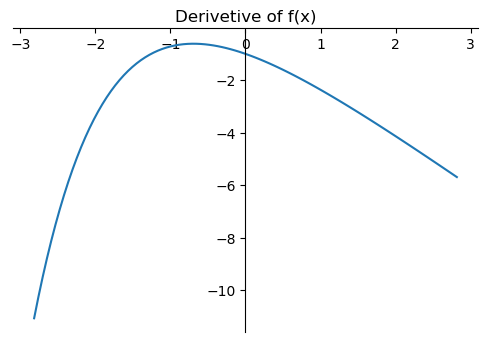

math.exp(-x)-x**2
math.exp(-x)-x**2
math.exp(-x)-x**2

Newton Raphson
4
lolo -x**2 + exp(-x)
soso -2*x - exp(-x)
1.0
end of iteration

0.733
36.4256480218281
end of iteration

0.7038
4.148905939187269
end of iteration



<ipython-input-13-5ab6d09359bd>:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XiBlusOne=round(Xi-(np.float(f.evalf(subs= {x:Xi})) / np.float(fderivative.evalf(subs= {x:Xi}))),precision)
<ipython-input-13-5ab6d09359bd>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  der = np.float(fderivative.evalf(subs= {x:xlist[i]}))


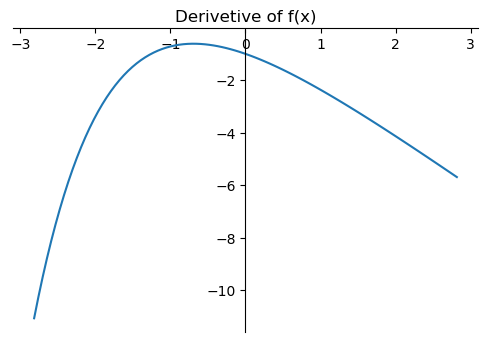

math.exp(-x)-x**2
math.exp(-x)-x**2
math.exp(-x)-x**2

Newton Raphson
4
lolo -x**2 + exp(-x)
soso -2*x - exp(-x)
1.0
end of iteration

0.733
36.4256480218281
end of iteration

0.7038
4.148905939187269
end of iteration



<ipython-input-13-5ab6d09359bd>:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XiBlusOne=round(Xi-(np.float(f.evalf(subs= {x:Xi})) / np.float(fderivative.evalf(subs= {x:Xi}))),precision)
<ipython-input-13-5ab6d09359bd>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  der = np.float(fderivative.evalf(subs= {x:xlist[i]}))


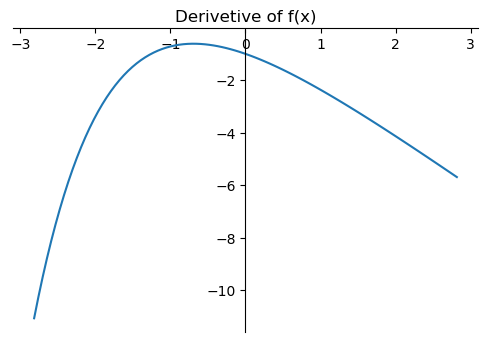

Newton Raphson
Newton Raphson
math.exp(-x)-x**2
math.exp(-x)-x**2
math.exp(-x)-x**2

Newton Raphson
4
lolo -x**2 + exp(-x)
soso -2*x - exp(-x)
1.0
end of iteration

0.733
36.4256480218281
end of iteration

0.7038
4.148905939187269
end of iteration



<ipython-input-13-5ab6d09359bd>:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XiBlusOne=round(Xi-(np.float(f.evalf(subs= {x:Xi})) / np.float(fderivative.evalf(subs= {x:Xi}))),precision)
<ipython-input-13-5ab6d09359bd>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  der = np.float(fderivative.evalf(subs= {x:xlist[i]}))


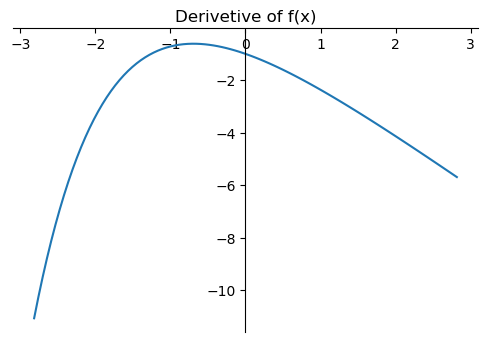

math.exp(-x)-x**2
math.exp(-x)-x**2
math.exp(-x)-x**2

Newton Raphson
4
lolo -x**2 + exp(-x)
soso -2*x - exp(-x)


<ipython-input-13-5ab6d09359bd>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  der = np.float(fderivative.evalf(subs= {x:xlist[i]}))


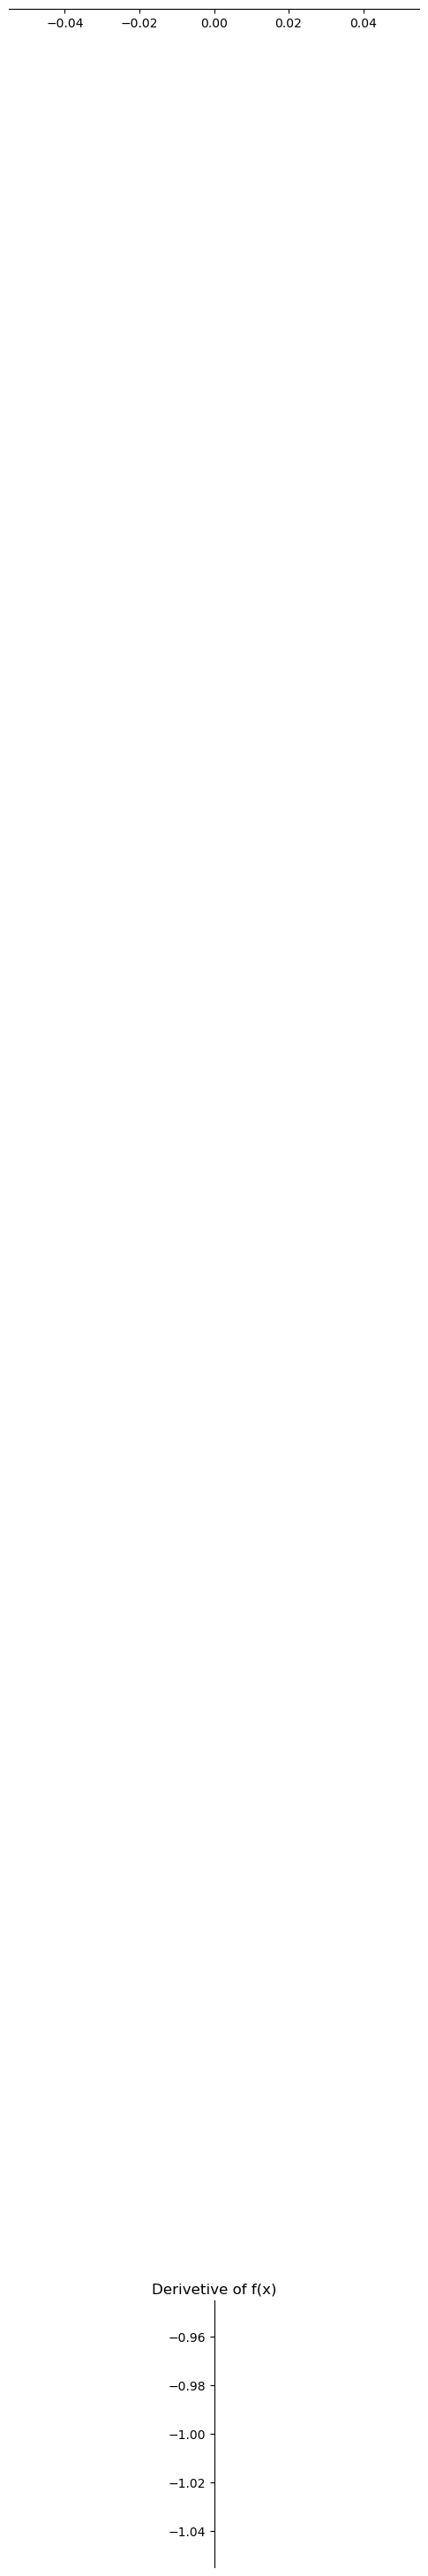

math.exp(-x)-x**2
math.exp(-x)-x**2
math.exp(-x)-x**2

Newton Raphson
4
lolo -x**2 + exp(-x)
soso -2*x - exp(-x)
1.0
end of iteration

0.733
36.4256480218281
end of iteration



<ipython-input-13-5ab6d09359bd>:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XiBlusOne=round(Xi-(np.float(f.evalf(subs= {x:Xi})) / np.float(fderivative.evalf(subs= {x:Xi}))),precision)
<ipython-input-13-5ab6d09359bd>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  der = np.float(fderivative.evalf(subs= {x:xlist[i]}))


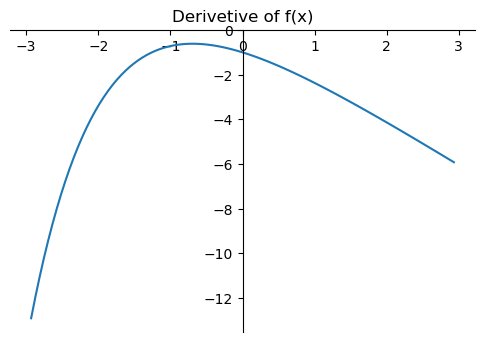

Secant
Newton Raphson
math.cos(x)-x*math.exp(x)
math.cos(x)-x*math.exp(x)
math.cos(x)-x*math.exp(x)

Secant
8
Value of iteration 1  is  0.8326726526874666
Value of iteration 2  is  0.7287785360163733
Value of iteration 3  is  0.562401196343723
Value of iteration 4  is  0.5247823048535349
Value of iteration 5  is  0.5180135653852875
Value of iteration 6  is  0.5177588653826207
Value of iteration 7  is  0.5177573640045621
x-math.sin(x)-0.5
x-math.sin(x)-0.5
x-math.sin(x)-0.5

Secant
4
Value of iteration 1  is  1.366316960917713
Value of iteration 2  is  1.467959776446559
Value of iteration 3  is  1.4995498931595255


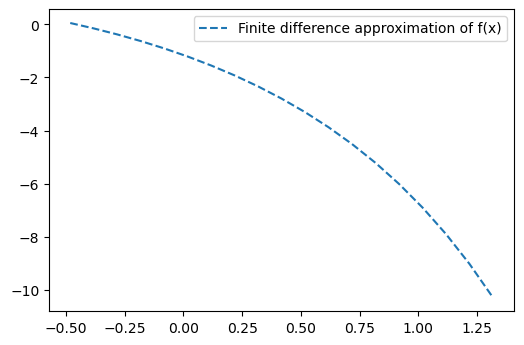

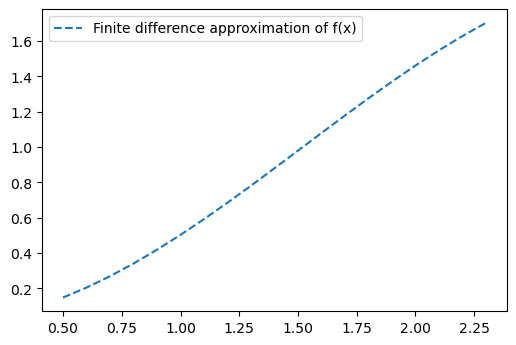

In [20]:
import sys
import os
import tkinter as tk
from tkinter.ttk import * 
from tkinter import ttk

#creating window 

window = tk.Tk()
window.geometry('2400x700')

window.title("equations ")
lbl = tk.Label(window, text="Solving Equations",  font=("Times New Roman Bold", 35),fg="blue")
lbl.grid(column=0, row=0)


#A textbox where the user writes equations separately each one in a line

tk.Label(window, text="Enter your equations :" , font=("Arial Bold", 20)).grid(column=0,row=1)
t = tk.Text(window, width=30, height=10 ,yscrollcommand=set() ,bd=9 ,font=("Arial Bold", 18 ))
t.focus()
t.grid(column=1,row=1)



meth = tk.Label(window, text="Choose method to solve your equations :",  font=("Arial Bold", 20))
meth.grid(column=0,row=5)

#precision and solving button
btn = tk.Button(window, text="Solve", font=("Arial Bold", 15 ),bg="white" ,fg="red", width=12 ,command=call)
btn.grid(column=2, row=4)
choose = tk.Label(window, text="Choose precision :",  font=("Arial Bold", 20))
choose.grid(column=0,row=4)
significantDown=Combobox(window)
significantDown['values']=("1","2","3","4","5")
significantDown.grid(column=1,row=4)

#methods dropdown list    
option=["Choose ","Gauss Elimination", "Gauss Jordan", "Gauss Seidel", "LU decomposition", "Jacobi",
        "Bisection", "False postion", "Newton Raphson", "Fixed Point", "Secant"]
clicked = tk.StringVar(window)

pp=OptionMenu(window ,clicked ,*option ,command=selected )
pp.grid(column=1,row=5)
window.mainloop()